In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as sgr
from analysis_tools import plot_trend

TypeError: float() argument must be a string or a number, not 'PosixPath'

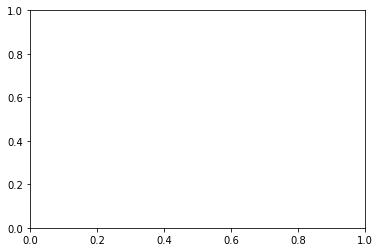

In [95]:
from pathlib import Path
p = Path('pieces')
sizes = [(x, x.stat().st_size) for x in p.glob('*')]
fig, ax = plt.subplots()
ax.plot(sizes)
ax.set_ybound(lower=0)
tempdir = None

In [71]:
data = pd.read_csv("results-22-Mar-2018.csv", index_col=0)
data['host'] = 'rapi'
data['watts'] = .5*5
more_data = pd.read_csv("outputMac5.csv", index_col=0)
more_data['host'] = 'laptop'
more_data['watts'] = 28.86
data = pd.concat([data, more_data])
data['Ws_per_pi'] = data['watts']*data['time']
data['Ws'] = data['Ws_per_pi']*data['pi_count']
#data.groupby(['host','pi_count','file_count'])['Ws'].describe()

In [30]:
mod = smf.ols(formula='Ws ~ host:pi_count', data=data)
res = mod.fit()
res.summary()

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ws   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     10.46
Date:                Sat, 17 Mar 2018   Prob (F-statistic):            0.00143
Time:                        12:51:07   Log-Likelihood:                -130.95
No. Observations:                  18   AIC:                             267.9
Df Residuals:                      15   BIC:                             270.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1904.5003    231.735      8.218      0.000    1410.569    2398.432
host[laptop]:pi_count  -668.4107    320.188     -2.088      0.054   -1350.875      14.053
host[rapi]:pi_count     119.5234     69.871      1.711      0.108     -29.403     268.449
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.698
Skew:                           0.438   Prob(JB):                        0.705
Kurtosis:                       2.596   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

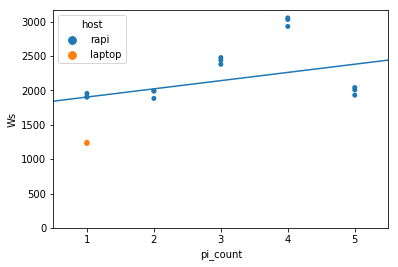

In [31]:
fig, ax = plt.subplots()
sns.stripplot(x='pi_count', y='Ws', hue='host', data=data, ax=ax)
#ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
#ax.autoscale()
plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')

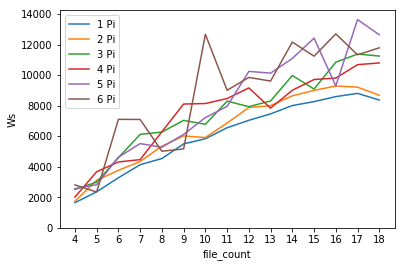

In [76]:
fig, ax = plt.subplots()
# sns.stripplot(x='file_count', y='Ws', hue='pi_count', data=data.loc[data['host'] == 'rapi'], ax=ax)
# ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
pidata = data.loc[data['host'] == 'rapi']
pidata = pidata.loc[pidata['file_count'] <= 18]
for count, grp in pidata.groupby('pi_count'):
    grp = grp.groupby('file_count').mean()
    line, = ax.plot(grp.index, grp['Ws'], '-')
    line.set_label(str(count) + " Pi")
ax.set_xlabel("file_count")
ax.set_ylabel("Ws")
ax.set_xticks(pidata['file_count'].unique())
ax.legend()
#ax.autoscale()
#plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')

In [ ]:
fig, ax = plt.subplots()
# sns.stripplot(x='file_count', y='Ws', hue='pi_count', data=data.loc[data['host'] == 'rapi'], ax=ax)
# ax.plot([33], res.predict({'pi_count': [33],'host': 'rapi'}), 'yo')
pidata = data.loc[data['host'] == 'rapi']
pidata = pidata.loc[pidata['file_count'] <= 18]
for count, grp in pidata.groupby('pi_count'):
    grp = grp.groupby('file_count').mean()
    line, = ax.plot(grp.index, grp['Ws'], '-')
    line.set_label(str(count) + " Pi")
ax.set_xlabel("file_count")
ax.set_ylabel("Ws")
ax.set_xticks(pidata['file_count'].unique())
ax.legend()
#ax.autoscale()
#plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)
fig.savefig('pi_count_vs_Ws.png')